# Computational Physics: Numerical Integrationn II
## The Biot-Savart Law
Class 15: 28 Feb 2024

<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid red"></hr>
Items for today:<br>
1. Questions on your code for numerical integration </br>
2. How to read an .xslx file or a .csv file
3. Using Julia to compute the magnetic field of a current loop </br>

<hr style="margin-bottom: 1px; border: 3px solid red"></hr>  

## IMPORTS:

In [10]:
using CSV, DataFrames, CairoMakie
using MathTeXEngine, Dates
using PlotUtils: optimize_ticks
# configure nice fonts for Makie :-) :
textheme = Theme(fonts=(; regular=texfont(:text),
                        bold=texfont(:bold),
                        italic=texfont(:italic),
                        bold_italic=texfont(:bolditalic)));

## How to read a  .csv file
You'll want to first install XLSX.jl, CSV.jl, and DataFrames.jl in the usual manner. 
I'll add a few other packages we will eventually need.

```julia
(@v1.10) pkg>  add XLSX, CSV, DataFrames, Dates, PlotUtils
```
Tip: Instead of *ls*, to read the files in your current directory in the REPL, you type
```julia
julia>  readdir()
```
Let's see how to readin the file DataFile.csv. We'll use the DataFrames package:

In [11]:
df = DataFrame(CSV.File("DataFile.csv"))

Row,day,date,x,y
,Int64,String15,Float64,Int64?
1,1,26-Feb-24,94.57,missing
2,2,27-Feb-24,92.97,missing
3,3,28-Feb-24,91.84,104


To examine the individual columns, we use the .format:

In [12]:
df.date

3-element Vector{String15}:
 "26-Feb-24"
 "27-Feb-24"
 "28-Feb-24"

In [13]:
df.x

3-element Vector{Float64}:
 94.57
 92.97
 91.84

We'll see how to plot using dates later; for now, let's just see how to make a plot of the "x" column versus the day number:

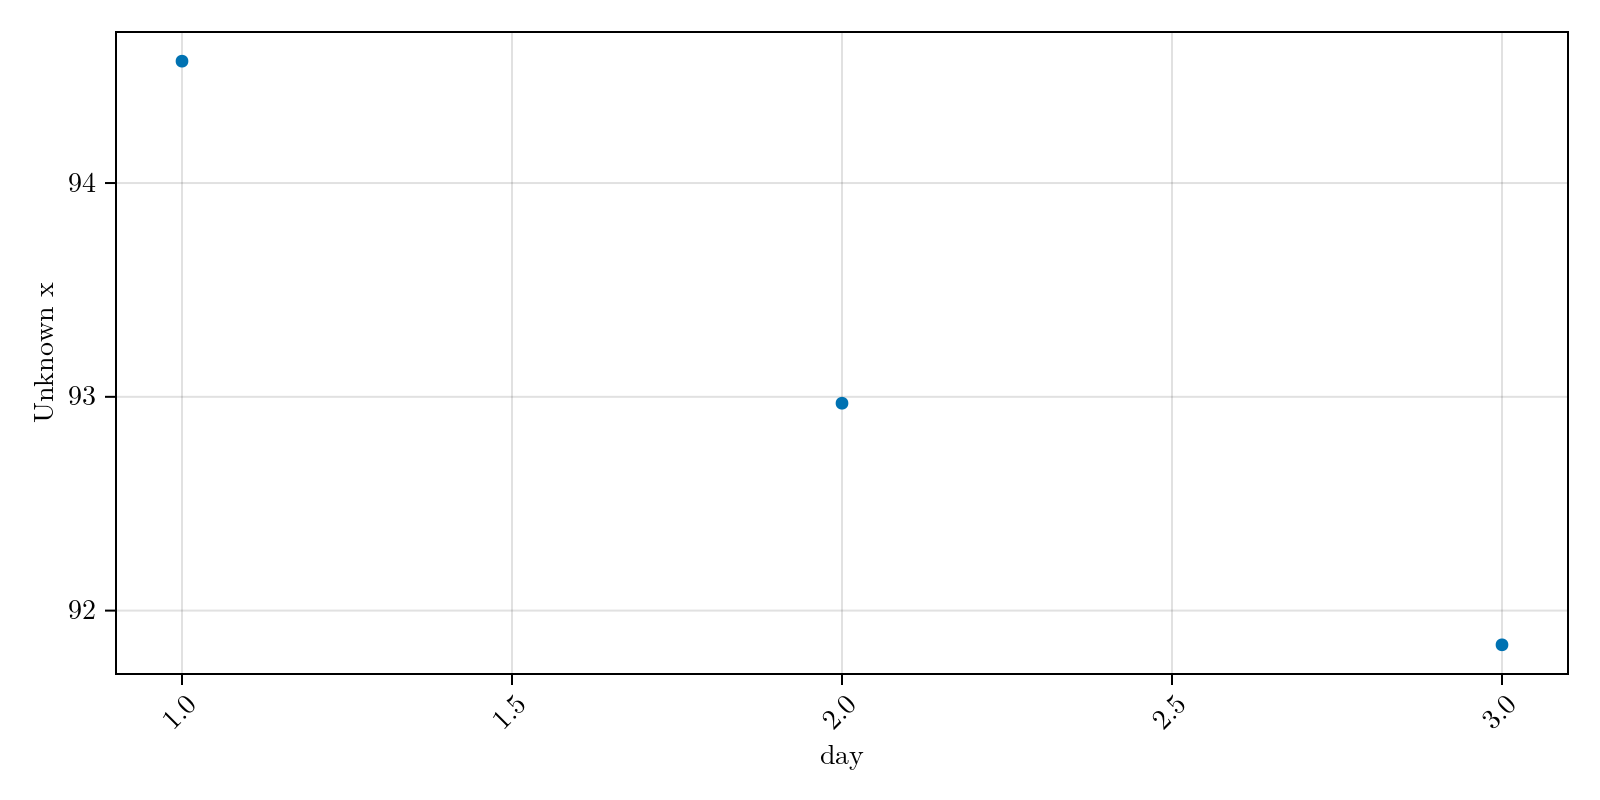

In [9]:
with_theme(textheme) do
fig = Figure(size=(800,400))
ax = Axis(fig[1,1])
scatter!(ax, df.day, df.x);
ax.xticklabelrotation = π/4
ax.xlabel = "day"
ax.ylabel = "Unknown x"
fig
end

## Using Julia to compute magnetic fields
In physics 123, you used the Biot-Savart law to compute the magnetic field; recall that the rule is 

$$d\mathbf{B} = \frac{\mu_o}{4\pi} \frac{\mathbf{I\,dl} \times \hat{r}}{r^2},$$

where $\mathbf{I\,dl}$ is an infinitesimal chunk of current (the source for the field) , and $\hat{r}$ is a unit vector which points 
*from the source* to the field point. Because it is not trivial to apply this formula except in cases with a high degree of symmetry, 
one only solves such "simple" cases analytically (although in upper level E&M classes, you do develop techniques to solve more challenging cases, but even these are limited to cases possessing symmetry.)

Today's class is about how to apply the Biot-Savart law to compute the magnetic field in general, and to do so, we will apply it to a case you've likely solved in Physics 123 --- the magnetic field created by a current loop. 
One of the things we will want to plot is a picture of the magnetic field perpendicular to the plane of the loop:

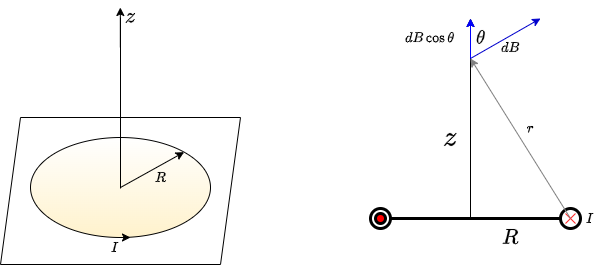

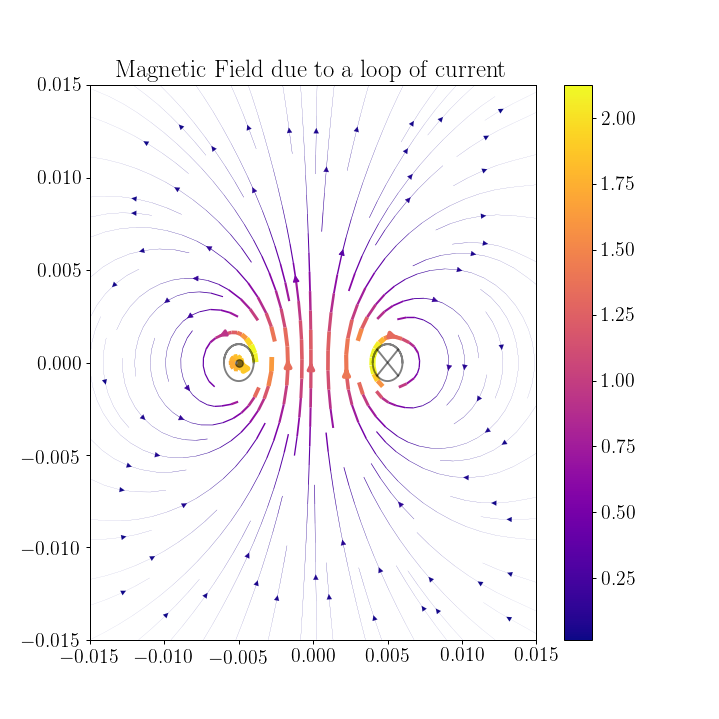